In [1]:
from fastai.tabular import *

In [2]:
df = pd.read_csv('forecasts.csv')

In [3]:
df

,surfline_spot_id,name,timestamp,avg_height,swell1_height,swell1_period,swell1_is_favorable_direction,swell2_height,swell2_period,swell2_is_favorable_direction,swell3_height,swell3_period,swell3_is_favorable_direction
0,5842041f4e65fad6a770893f,Leo Carillo,2020-02-22 11:15:21.477666,2.50,0.56,12,N,0.36,11,Y,1.41,14,Y
1,584204214e65fad6a7709b9f,Malibu First Point,2020-02-22 11:15:21.477666,2.50,1.41,14,Y,0.36,12,N,0.30,11,Y
2,5842041f4e65fad6a770883c,Windansea,2020-02-22 11:15:21.477666,3.50,0.85,10,Y,0.52,8,Y,0.36,11,N
3,5842041f4e65fad6a7708805,Steamer Lane,2020-02-22 11:15:21.477666,4.25,2.20,5,Y,0.20,11,Y,6.50,12,N
4,5842041f4e65fad6a7708840,Sunset Cliffs,2020-02-22 11:15:21.477666,3.50,0.69,12,N,0.62,10,N,0.49,8,N
5,5842041f4e65fad6a770893f,Leo Carillo,2020-02-22 16:00:15.196466,2.50,0.56,12,N,0.69,10,N,0.36,11,Y
6,584204214e65fad6a7709b9f,Malibu First Point,2020-02-22 16:00:15.196466,2.50,0.36,10,N,1.41,14,Y,0.30,11,Y
7,5842041f4e65fad6a770883c,Windansea,2020-02-22 16:00:15.196466,3.00,0.85,10,Y,0.52,8,Y,0.36,11,N
8,5842041f4e65fad6a7708805,Steamer Lane,2020-02-22 16:00:15.196466,4.25,2.20,5,Y,0.20,11,Y,6.50,12,N
9,5842041f4e65fad6a7708840,Sunset Cliffs,2020-02-22 16:00:15.196466,3.00,0.69,12,N,0.62,10,N,0.49,8,N


In [4]:
dep_var = 'avg_height'
cat_names = ['swell1_is_favorable_direction', 'swell2_is_favorable_direction', 'swell3_is_favorable_direction']
cont_names = ['swell1_height', 'swell1_period', 'swell2_height', 'swell2_period', 'swell3_height', 'swell3_period']
procs = [FillMissing, Categorify, Normalize]

In [5]:
test = TabularList.from_df(df.iloc[19:24].copy(), path='.', cat_names=cat_names, cont_names=cont_names)

In [6]:
data = (TabularList.from_df(df, path='.', cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(19,24)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch(bs=5))

In [7]:
data.show_batch(rows=5)

swell1_is_favorable_direction,swell2_is_favorable_direction,swell3_is_favorable_direction,swell1_height,swell1_period,swell2_height,swell2_period,swell3_height,swell3_period,target
N,N,Y,0.2130,0.5878,-0.1114,-0.6700,-0.4673,-0.5210,1.5
N,N,Y,-0.7726,0.5878,-0.6576,-3.4186,-0.0277,1.5630,2.5
N,Y,Y,-0.7726,0.5878,-0.4821,0.3608,-0.0277,1.5630,2.5
N,N,N,0.6473,-1.4694,0.2056,0.7043,-0.1104,0.5210,3.0
Y,N,Y,0.6473,1.1755,-0.4821,0.7043,-0.6018,0.0000,2.5


In [13]:
learn = tabular_learner(data, layers=[200,100], metrics=rmse)

In [14]:
learn.fit(5, 1e-2)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,9.965642,9.387299,3.063870,00:00
1,9.151751,6.608247,2.570651,00:00
2,8.024073,2.782865,1.668192,00:00
3,6.770862,1.802993,1.342756,00:00
4,5.503612,1.538793,1.240481,00:00


In [15]:
row = df.iloc[0]

In [16]:
learn.predict(row)

(FloatItem [2.730814], tensor([2.7308]), tensor([2.7308]))

In [17]:
learn.save('stage-1')

In [23]:
learn.load('stage-1');

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


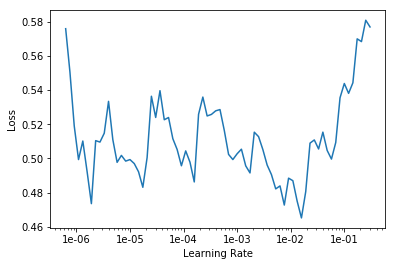

In [26]:
learn.recorder.plot()

In [27]:
learn.unfreeze()

In [28]:
learn.fit(5, 1e-2)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,1.189386,0.506438,0.711645,00:00
1,0.943016,5.357601,2.314649,00:00
2,0.910368,5.035582,2.244010,00:00
3,0.873001,2.568451,1.602639,00:00
4,0.881898,1.107758,1.052501,00:00


In [41]:
row = df.iloc[19]

In [42]:
learn.predict(row)

(FloatItem [2.088657], tensor([2.0887]), tensor([2.0887]))